## Data Visualization

In [34]:
import pandas as pd
import zipfile
import os

path = 'Synthetic dataset for task 2.zip'

with zipfile.ZipFile(path) as z:
    with z.open('Synthetic dataset for task 2/items.csv') as f:
        df_items = pd.read_csv(f)
    with z.open('Synthetic dataset for task 2/keywords.csv') as f:
        df_keywords = pd.read_csv(f)
    with z.open('Synthetic dataset for task 2/merchant.csv') as f:
        df_merchant = pd.read_csv(f)
    with z.open('Synthetic dataset for task 2/transaction_data.csv') as f:
        df_transaction_data = pd.read_csv(f)
    with z.open('Synthetic dataset for task 2/transaction_items.csv') as f:
        df_transaction_items = pd.read_csv(f)

In [35]:
# Visualize the dataframes
df_items.head(), df_keywords.head(), df_merchant.head(), df_transaction_data.head(), df_transaction_items.head()

(   item_id cuisine_tag                   item_name  item_price merchant_id
 0        1        Side          Fried Spring Rolls        3.50       1d4f2
 1        2    American  Lemon Pepper Wings (6 pcs)        7.75       8d5f9
 2        3       Asian       General Tso’s Chicken        9.50       1a3f7
 3        4    American           Bacon Wrapped Dog        5.25       d3b6a
 4        5     Dessert                       Kulfi        3.75       a3e8b,
    Unnamed: 0              keyword   view   menu  checkout  order
 0           0   fried spring rolls  37816  11185      3882    153
 1           1         spring rolls   8977   2903      1453    143
 2           2  crispy spring rolls  11922   3604      1627    147
 3           3            egg rolls   9587   1879      1130     75
 4           4         fried lumpia  32437   9716      3036    233,
   merchant_id merchant_name  join_date  city_id
 0       3e2b6    Bagel Bros   14122015        8
 1       2b5d7   Bagel House   16082017   

In [36]:
# Drop the unnecessary column of each dataframe
df_keywords.drop(columns=['Unnamed: 0'], inplace=True)
df_transaction_data.drop(columns=['Unnamed: 0'], inplace=True)
  

In [37]:
df_transaction_items.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
# Revisualise the cleaned data
df_items.head(), df_keywords.head(), df_merchant.head(), df_transaction_data.head(), df_transaction_items.head()

(   item_id cuisine_tag                   item_name  item_price merchant_id
 0        1        Side          Fried Spring Rolls        3.50       1d4f2
 1        2    American  Lemon Pepper Wings (6 pcs)        7.75       8d5f9
 2        3       Asian       General Tso’s Chicken        9.50       1a3f7
 3        4    American           Bacon Wrapped Dog        5.25       d3b6a
 4        5     Dessert                       Kulfi        3.75       a3e8b,
                keyword   view   menu  checkout  order
 0   fried spring rolls  37816  11185      3882    153
 1         spring rolls   8977   2903      1453    143
 2  crispy spring rolls  11922   3604      1627    147
 3            egg rolls   9587   1879      1130     75
 4         fried lumpia  32437   9716      3036    233,
   merchant_id merchant_name  join_date  city_id
 0       3e2b6    Bagel Bros   14122015        8
 1       2b5d7   Bagel House   16082017        4
 2       2a1c4    BBQ Corner    3072016        2
 3       e8c2b  

In [39]:
# Check the data types of the columns in each dataframe
df_items.dtypes, df_keywords.dtypes, df_merchant.dtypes, df_transaction_data.dtypes, df_transaction_items.dtypes

(item_id          int64
 cuisine_tag     object
 item_name       object
 item_price     float64
 merchant_id     object
 dtype: object,
 keyword     object
 view         int64
 menu         int64
 checkout     int64
 order        int64
 dtype: object,
 merchant_id      object
 merchant_name    object
 join_date         int64
 city_id           int64
 dtype: object,
 order_id                object
 order_time              object
 driver_arrival_time     object
 driver_pickup_time      object
 delivery_time           object
 order_value            float64
 eater_id                 int64
 merchant_id             object
 dtype: object,
 order_id       object
 item_id         int64
 merchant_id    object
 dtype: object)

In [40]:
# Check for missing values in each dataframe
df_items.isnull().sum(), df_keywords.isnull().sum(), df_merchant.isnull().sum(), df_transaction_data.isnull().sum(), df_transaction_items.isnull().sum()

(item_id        0
 cuisine_tag    0
 item_name      0
 item_price     0
 merchant_id    0
 dtype: int64,
 keyword     0
 view        0
 menu        0
 checkout    0
 order       0
 dtype: int64,
 merchant_id      0
 merchant_name    0
 join_date        0
 city_id          0
 dtype: int64,
 order_id               0
 order_time             0
 driver_arrival_time    0
 driver_pickup_time     0
 delivery_time          0
 order_value            0
 eater_id               0
 merchant_id            0
 dtype: int64,
 order_id       0
 item_id        0
 merchant_id    0
 dtype: int64)

Since the datasets provided, does not consists of `NaN` values, hence the data is considered cleaned

### Analysis & Understanding the datasets
Generally,
`merchant_id` represents merchant's registered id 
`merchant_name` represents their name

1. From `df_items` dataframe:
`item_id` is the id that represents an item/product
`cuisine_tag` represents the cuisine type sold, such as `Sides`
`item_name` is the food name
`item_price` is the price of food item

2. From `df_keyward` dataframe:
`keyword` refers food item
`views` as the number of views to the item
`menu` represents the number of appearances of the item in menu/search
`checkout` is the number of time that the item was added into custometr cart
`order` is the number of orders placement on the item

3. From `df_merchant` dataframe: 
`join date` is the date of the merchant joined the company
`city_id` represents the city of the merchant operating their business

4. From `df_transaction_data` dataframe:
`order_id` is the order id for each order (D/O id)
`order_time` time of order placement
`driver_arrival_time` delivery man arrival time
`driver_pickup_time` deliver man pick up time
`delivery_time`  item arrival time
`order_value` cost of item purchased by customer(s)   
`eater_id` customers' id

5. From `df_transaction_items` dataframe:
`order_id` is the order id for each order (D/O id)
`item_id` is the id that represents an item/product


## Exploratory Data Analysis, Question and Answer (Some common insights)

items.csv


In [41]:
cheapest_item = df_items.loc[df_items['item_price'].idxmin()]
cheapest_item

item_id                 129
cuisine_tag            Side
item_name      Tartar Sauce
item_price             0.75
merchant_id           9b4c2
Name: 128, dtype: object

In [42]:
most_expensive_item = df_items.loc[df_items['item_price'].idxmax()]
most_expensive_item

item_id                 241
cuisine_tag           Steak
item_name      Filet Mignon
item_price            18.75
merchant_id           a1b5e
Name: 240, dtype: object

In [76]:
average_price = df_items['item_price'].mean()
print(f"Average price: {average_price:.2f}")

Average price: 7.06


In [75]:
mode_price = df_items['item_price'].mode()[0]
print(f"Mode price: {mode_price:.2f}")

Mode price: 7.50


keywords.csv

Top 10 by views:
                   keyword   view   menu  checkout  order
2916  chili oil dumplings  49986  13983      5020    239
3254      sparkling drink  49975  12722      4404    353
2237     pizza empat keju  49948  16692      4707    366
2330    bánh sữa Rasgulla  49944   8667      5938    281
1495     pancit sotanghon  49917  18254      9052    680
3909   ayam goreng klasik  49917  15010      9600    447
940          mac & cheese  49899  18913      7899    379
1541    burrito isi telur  49881  10399      4467    350
899   dumpling isi daging  49873  16973     10389   1003
4317  veggie lovers pizza  49857  16123      6232    404

Top 10 by menu:
                      keyword   view   menu  checkout  order
775   spinach strawberry mix  49707  19563     13645    921
4047              nasi lemon  49582  19447     12813    782
1490       pho daging campur  49722  19298     12056   1059
3565          salad zucchini  47959  19073     11653    759
2214          indian paratha  48903  

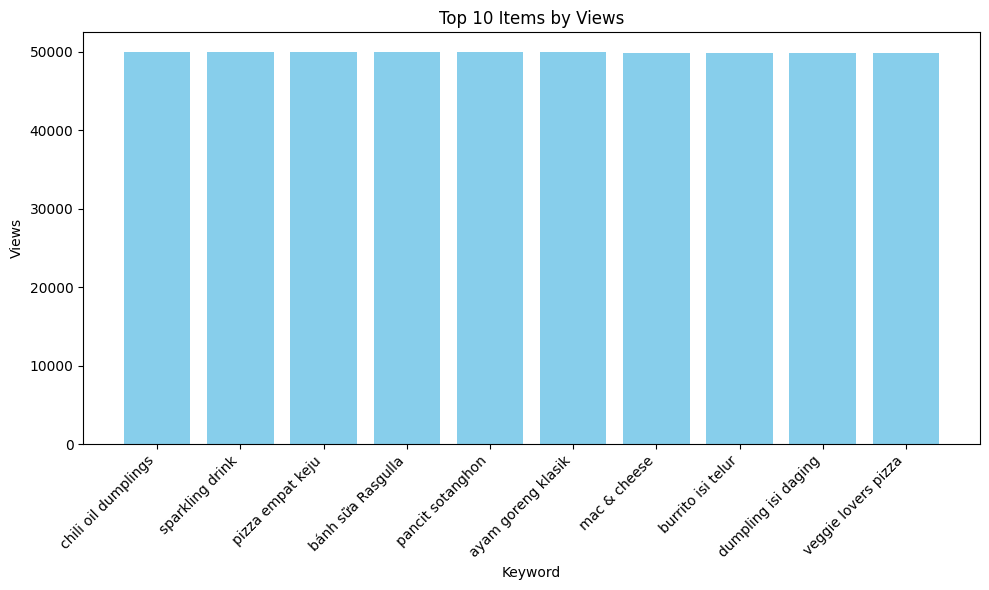

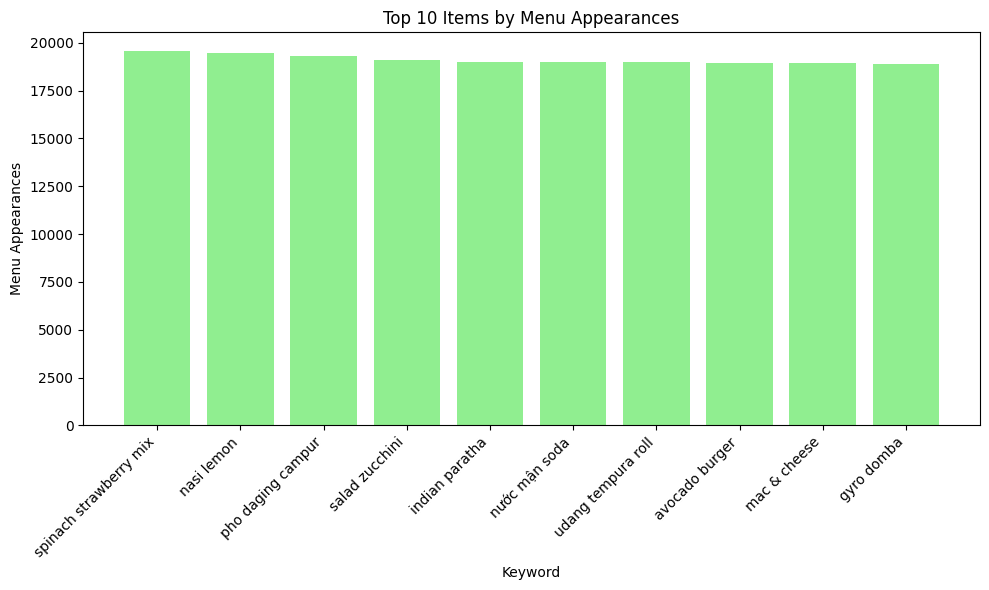

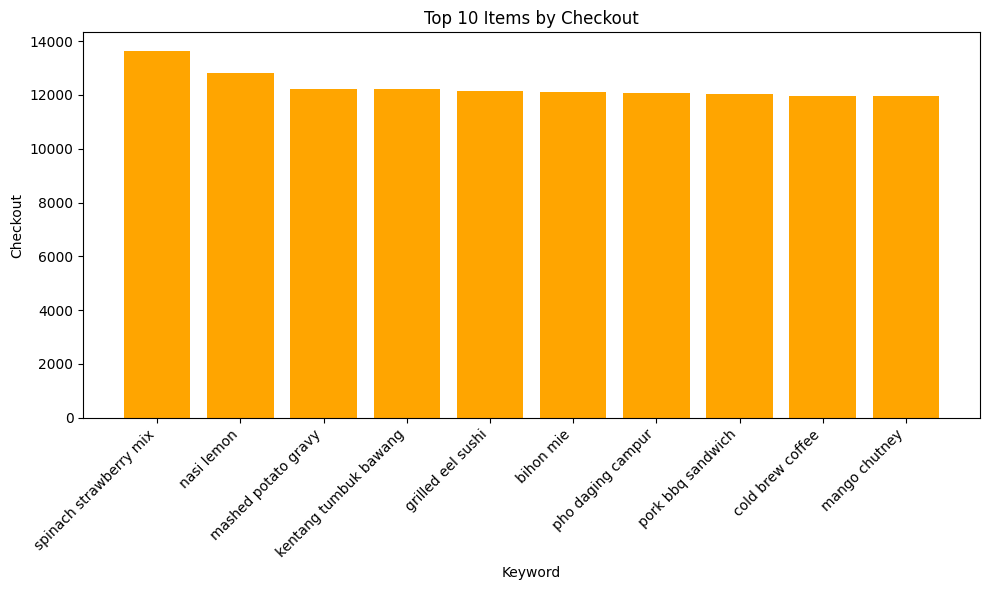

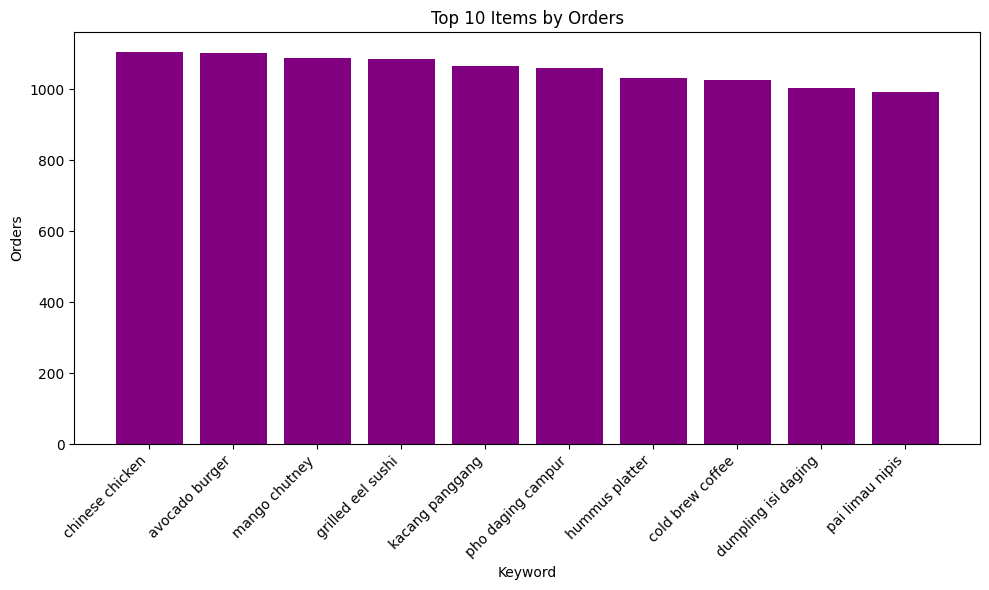

In [74]:
# Top 10 by views
top10_view = df_keywords.nlargest(10, 'view')

# Top 10 by menu appearances
top10_menu = df_keywords.nlargest(10, 'menu')

# Top 10 by checkout
top10_checkout = df_keywords.nlargest(10, 'checkout')

# Top 10 by orders
top10_order = df_keywords.nlargest(10, 'order')

print("Top 10 by views:\n", top10_view)
print("\nTop 10 by menu:\n", top10_menu)
print("\nTop 10 by checkout:\n", top10_checkout)
print("\nTop 10 by order:\n", top10_order)

# Plot for Top 10 by views
plt.figure(figsize=(10, 6))
plt.bar(top10_view['keyword'], top10_view['view'], color='skyblue')
plt.title('Top 10 Items by Views')
plt.xlabel('Keyword')
plt.ylabel('Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting for menu appearances
plt.figure(figsize=(10, 6))
plt.bar(top10_menu['keyword'], top10_menu['menu'], color='lightgreen')
plt.title('Top 10 Items by Menu Appearances')
plt.xlabel('Keyword')
plt.ylabel('Menu Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting for checkout
plt.figure(figsize=(10, 6))
plt.bar(top10_checkout['keyword'], top10_checkout['checkout'], color='orange')
plt.title('Top 10 Items by Checkout')
plt.xlabel('Keyword')
plt.ylabel('Checkout')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting for orders
plt.figure(figsize=(10, 6))
plt.bar(top10_order['keyword'], top10_order['order'], color='purple')
plt.title('Top 10 Items by Orders')
plt.xlabel('Keyword')
plt.ylabel('Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Average views, menu appearances, checkout, and orders per item
# Used to porpose more users for GrabFood
average_views = df_keywords['view'].mean()
average_menu = df_keywords['menu'].mean()
average_checkout = df_keywords['checkout'].mean()
average_orders = df_keywords['order'].mean()

print(f"\nAverage views: {average_views:.2f}")
print(f"Average menu appearances: {average_menu:.2f}")
print(f"Average checkout: {average_checkout:.2f}")
print(f"Average orders: {average_orders:.2f}")


Average views: 25933.19
Average menu appearances: 7153.49
Average checkout: 3381.25
Average orders: 226.33


merchant.csv


City counts:
 city_id
5    29
2    29
8    23
1     9
4     5
6     3
3     1
7     1
Name: count, dtype: int64


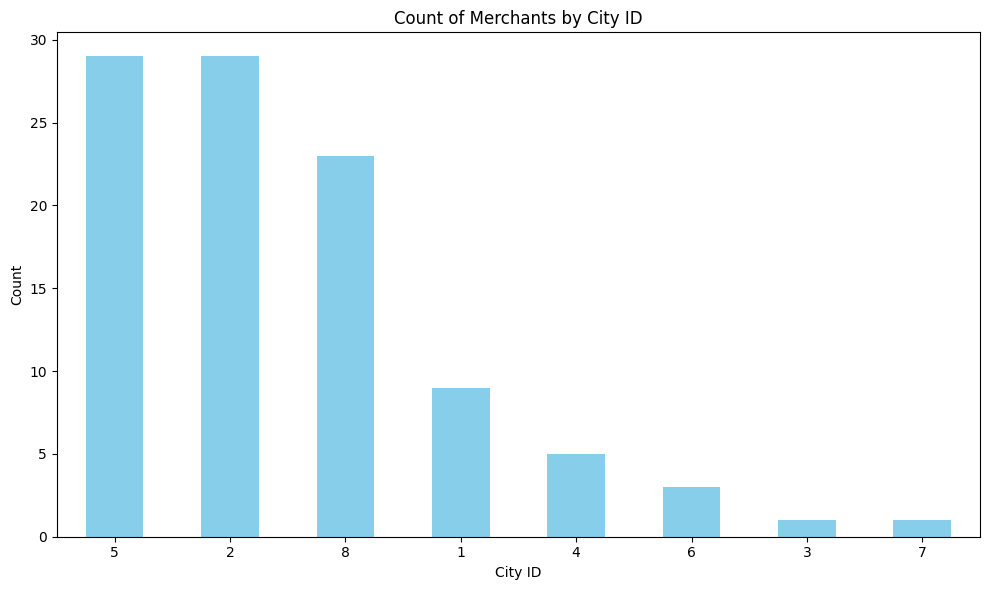

In [ ]:
# Count of each city_id
city_counts = df_merchant['city_id'].value_counts()
print("\nCity counts:\n", city_counts)
# From here we can see that the most popular city is 5, followed by 2 and 8.

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Merchants by City ID')
plt.xlabel('City ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

transaction_data.csv


Average Delivery Time (minutes): 38.5


C:\Users\Harry\AppData\Local\Temp\ipykernel_62220\468426419.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts.index, y=order_counts.values, palette='magma')


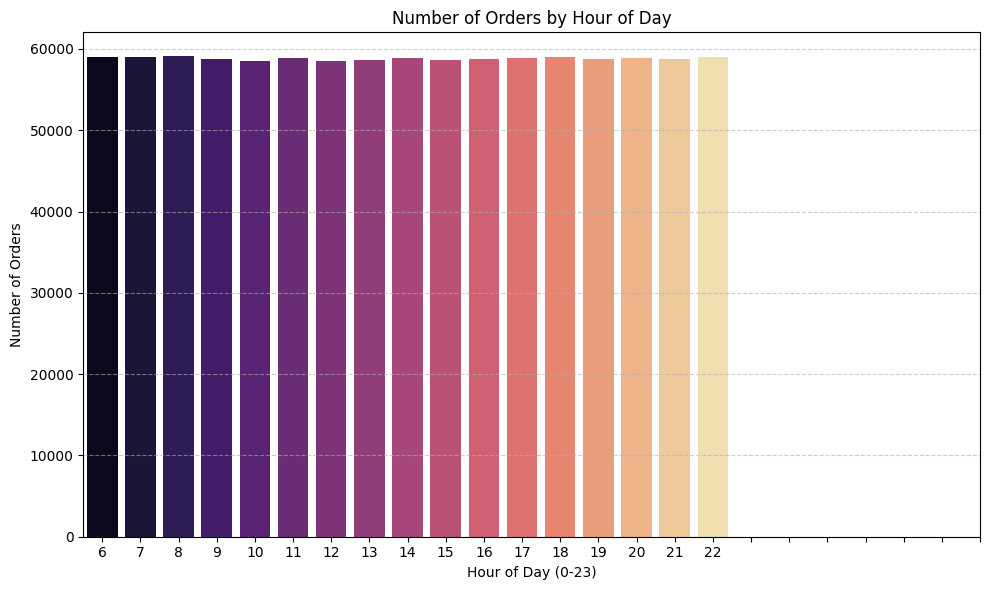

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_transaction_data

df['order_time'] = pd.to_datetime(df_transaction_data['order_time'])
df['delivery_time'] = pd.to_datetime(df['delivery_time'])

df['delivery_duration'] = (df['delivery_time'] - df['order_time']).dt.total_seconds() / 60

df['normalized_delivery_duration'] = (df['delivery_duration'] - df['delivery_duration'].min()) / (df['delivery_duration'].max() - df['delivery_duration'].min())

avg_delivery_time = df['delivery_duration'].mean()
print("Average Delivery Time (minutes):", round(avg_delivery_time, 2))

df['order_hour'] = df['order_time'].dt.hour

order_counts = df['order_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='magma')

plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


transaction_items.csv

Top 10 Popular Item IDs:
    item_id  count
0      391  41528
1      262  40733
2       70  35459
3      155  33857
4      306  26057
5      227  24958
6      140  23953
7       12  23735
8       51  23255
9      248  22374


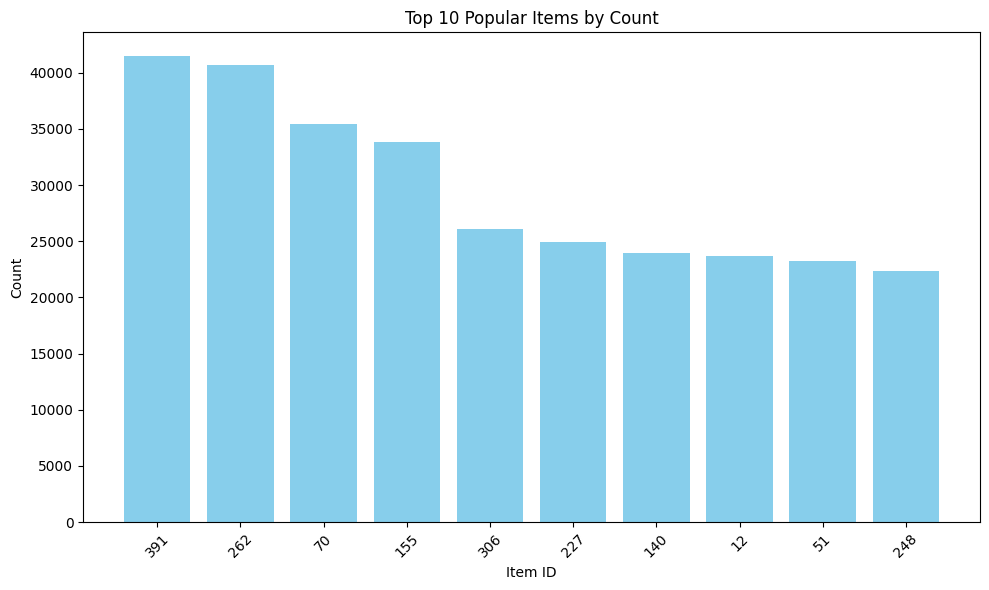

Most Popular Item ID: 391
Most Popular Item Count: 41528


In [70]:
# Top 10 popular items
top10_items = df_transaction_items['item_id'].value_counts().head(10).reset_index()
top10_items.columns = ['item_id', 'count']
print("Top 10 Popular Item IDs:\n", top10_items)

# Plot the top 10 popular items
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top10_items['item_id'].astype(str), top10_items['count'], color='skyblue')
plt.title('Top 10 Popular Items by Count')
plt.xlabel('Item ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most popular item
most_popular_item_count = df_transaction_items['item_id'].value_counts().max()
print("Most Popular Item ID:", most_popular_item)
print("Most Popular Item Count:", most_popular_item_count)